# Load and plot raw data

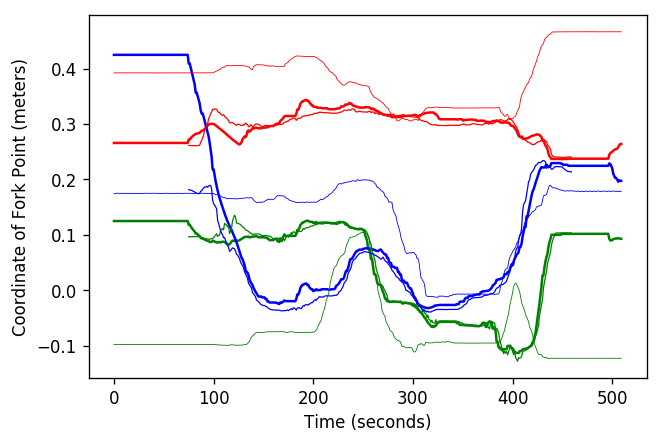

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure(dpi= 120, facecolor='w', edgecolor='k')
#### read in the txt file
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt
both_spoons = np.loadtxt('../data/spoon_poses_both.txt', delimiter=',')
initial_recording = np.loadtxt('../data/short_fork_careful_carry.txt', delimiter=',')
#plt.plot(raw_data[:,(1,2,3,8,9,10)])
# Transform from second robot to frame of first robot
import transforms3d as t3d
q = [0, 0, 0, 1] # 180 degree rotation around z axis (w,x,y,z)
M = t3d.quaternions.quat2mat(q) # from this module
T = [[0.63, 0.0, 0]]
transform = np.concatenate((np.concatenate((M,np.transpose(T)),1),[[0,0,0,1]]))
# Plot the trajectories in the same coordinate frame
time = np.size(both_spoons,0)
homogeneous_follower = np.transpose(np.concatenate((both_spoons[:,1:4],np.ones((time,1))),1))
follower = np.transpose(np.dot(transform, homogeneous_follower))
follower.shape
same_frame_data = np.concatenate((both_spoons[:,8:11],follower[:,0:3]),1)
from cycler import cycler
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = cycler(color='rgb')
relevant_indices = range(0,len(both_spoons))#range(250,400)#
plt.plot(both_spoons[relevant_indices,8:11])
plt.plot(follower[relevant_indices,0:3],linewidth=0.5)
default_x = np.arange(initial_recording.shape[0])
plt.plot(default_x + 75,initial_recording[:,1:4],linewidth=0.75)
plt.xlabel("Time (seconds)")
plt.ylabel("Coordinate of Fork Point (meters)");

# Write out new file using first recording instead of second for first arm

In [41]:
row_id = 0
start_offset = 75
with open("../data/sharpened_spoon_poses.txt","w") as ofile:
    while row_id < both_spoons.shape[0]:
        if row_id < start_offset or row_id >= start_offset + initial_recording.shape[0]:
            ofile.write("%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n" % tuple(both_spoons[row_id,:]))
        else:
            ofile.write("%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n" % tuple(np.concatenate((both_spoons[row_id,0:1],
                                                          both_spoons[row_id,1:8],
                                                          initial_recording[row_id - start_offset,1:8]))))
        row_id += 1

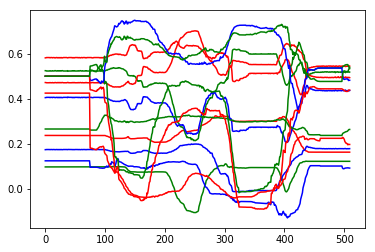

In [42]:
sharpened_data = np.loadtxt('../data/sharpened_spoon_poses.txt', delimiter=',')
plt.plot(sharpened_data[:,1:])